In [139]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV

from scipy import stats
import imblearn
from imblearn.pipeline import Pipeline

import eli5
from eli5.sklearn import PermutationImportance
import shap
from pdpbox import pdp, info_plots

# Data Exploration

In [99]:
data = pd.read_csv("../datasets/bankruptcy.csv")

In [100]:
data.shape

(6819, 96)

In [101]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [102]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [103]:
data.columns = [col.strip().replace(" ", "_").lower() for col in data.columns]

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   bankrupt?                                                6819 non-null   int64  
 1   roa(c)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   roa(a)_before_interest_and_%_after_tax                   6819 non-null   float64
 3   roa(b)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   operating_gross_margin                                   6819 non-null   float64
 5   realized_sales_gross_margin                              6819 non-null   float64
 6   operating_profit_rate                                    6819 non-null   float64
 7   pre-tax_net_interest_rate                                6819 non-null   float64
 8   after-tax_net_interest_rate 

In [105]:
data.describe()

,bankrupt?,roa(c)_before_interest_and_depreciation_before_interest,roa(a)_before_interest_and_%_after_tax,roa(b)_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre-tax_net_interest_rate,after-tax_net_interest_rate,non-industry_income_and_expenditure/revenue,...,net_income_to_total_assets,total_assets_to_gnp_price,no-credit_interval,gross_profit_to_sales,net_income_to_stockholder's_equity,liability_to_equity,degree_of_financial_leverage_(dfl),interest_coverage_ratio_(interest_expense_to_ebit),net_income_flag,equity_to_liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [106]:
# view correlations to the dependent variable
data.corr()["bankrupt?"].sort_values(ascending=False)
# lots of variables, but very low correlations. This might be hard.

bankrupt?                                                  1.000000
debt_ratio_%                                               0.250161
current_liability_to_assets                                0.194494
borrowing_dependency                                       0.176543
current_liability_to_current_assets                        0.171306
                                                             ...   
roa(c)_before_interest_and_depreciation_before_interest   -0.260807
roa(b)_before_interest_and_depreciation_after_tax         -0.273051
roa(a)_before_interest_and_%_after_tax                    -0.282941
net_income_to_total_assets                                -0.315457
net_income_flag                                                 NaN
Name: bankrupt?, Length: 96, dtype: float64

In [107]:
corr = data.corr().abs().unstack().sort_values(ascending=False)
print(corr[corr != 1])
# There seems to be quite a lot of multicollinearity, so much such that it will be hard to simply remove correlated variables.
# Therefore, we will have to limit our analysis to nonlinear methods that don't care as much about multicollinearlity, or regularized linear methods that deal with it.

net_worth/assets         debt_ratio_%                                          1.000000
debt_ratio_%             net_worth/assets                                      1.000000
gross_profit_to_sales    operating_gross_margin                                1.000000
operating_gross_margin   gross_profit_to_sales                                 1.000000
net_value_per_share_(c)  net_value_per_share_(a)                               0.999837
                                                                                 ...   
net_income_flag          degree_of_financial_leverage_(dfl)                         NaN
                         interest_coverage_ratio_(interest_expense_to_ebit)         NaN
                         net_income_flag                                            NaN
                         equity_to_liability                                        NaN
equity_to_liability      net_income_flag                                            NaN
Length: 9117, dtype: float64


# Data Processing

In [108]:
print(data[["net_income_flag"]].value_counts())
data = data.drop("net_income_flag", axis=1)

net_income_flag
1                  6819
dtype: int64


In [109]:
data.duplicated(keep=False).value_counts()

False    6819
dtype: int64

In [110]:
# check for null values
nulls = data.isnull().sum()
nulls[nulls > 0]

# thankfully, we don't have to do any imputation.

Series([], dtype: int64)

In [111]:
data[["bankrupt?"]].value_counts()
# we're going to have to deal with this imbalance somehow, to avoid overfitting.
# we can either oversample or undersample our data

X = data.drop("bankrupt?", axis=1)
y = [item[0] for item in data[["bankrupt?"]].values]

In [112]:
# We have a lot of features; we can remove some based on variance thresholds.

from sklearn.feature_selection import VarianceThreshold
X_mean = np.mean(X, axis=0)
vt = VarianceThreshold(5.0).fit(X/X_mean)
X = X[X.columns[vt.get_support(indices=True)]]
X.shape

(6819, 21)

In [113]:
# Alternatively, we can use random forest elimination instead.
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

rfe = RFE(estimator = RandomForestClassifier(n_estimators=300, class_weight={0:1,1:4}), n_features_to_select=16, verbose=1).fit(X, y)

Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.


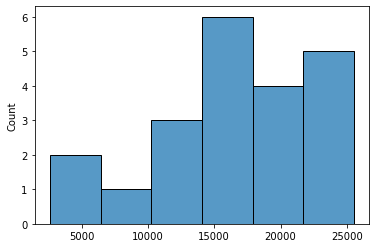

0


In [114]:
# check normality
stat, p = stats.normaltest(X)
sns.histplot(stat)
plt.show()
p = pd.Series(p)
print(len(p[p > 0.05]))

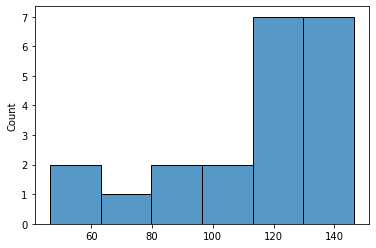

0


In [115]:
# check skewness
stat, p = stats.skewtest(X)
sns.histplot(stat)
plt.show()
p = pd.Series(p)
print(len(p[p > 0.05]))

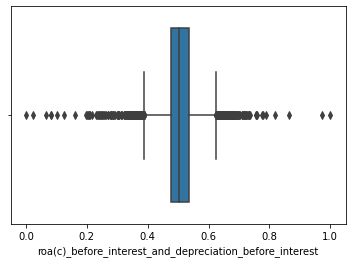

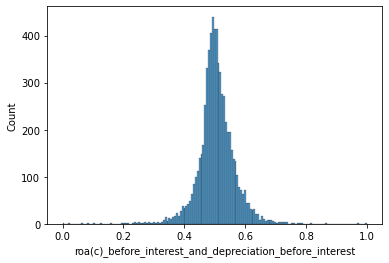

In [116]:
sns.boxplot(data[data.columns[1]])
plt.show()
sns.histplot(data[data.columns[1]])
plt.show()

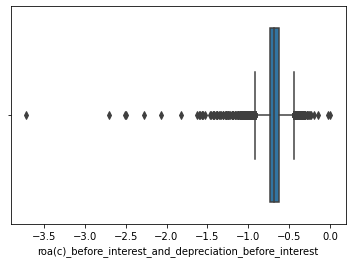

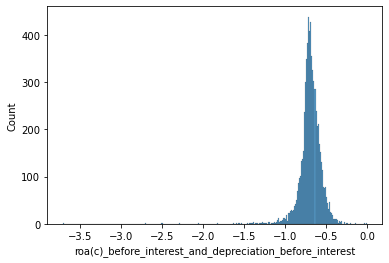

In [117]:
logged = np.log(data[data.columns[1]]).replace([np.inf, -np.inf], np.nan).dropna()
sns.boxplot(logged)
plt.show()
sns.histplot(logged)
plt.show()

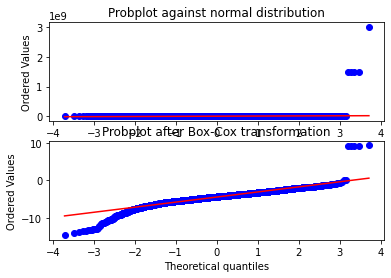

In [118]:
# because some of our data has zeroes in it, using boxcox transformation is ill-advised.
# i didn't really expect boxcox to work, but it's good to test.

fig = plt.figure()
ax1 = fig.add_subplot(211)
x = X[X.columns[1]].replace(0, np.nan).dropna()
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

In [119]:
# check for outliers
zscores = X.apply(stats.zscore).abs()
zscores[zscores < 3] = 0
zscores[zscores >= 3] = 1
zscores.sum(axis=0)
# unfortunately, calculating z scores may not be very helpful here, as the data is not normal.
# for our analysis, we're going to have to use something like a RobustScaler in our pipline.
# if necessary, we can do a separate transform, such as topcoding, to remove outliers.

interest-bearing_debt_interest_rate      146.0
revenue_per_share_(yuan_¥)                 5.0
net_value_growth_rate                      2.0
current_ratio                              1.0
quick_ratio                                9.0
total_debt/total_net_worth                 7.0
long-term_fund_suitability_ratio_(a)      27.0
accounts_receivable_turnover              18.0
average_collection_days                   12.0
fixed_assets_turnover_frequency          251.0
revenue_per_person                         2.0
allocation_rate_per_person                11.0
quick_assets/current_liability             3.0
cash/current_liability                    39.0
inventory/current_liability               66.0
long-term_liability_to_current_assets     65.0
total_income/total_expense                 1.0
current_asset_turnover_rate              108.0
fixed_assets_to_assets                     1.0
liability-assets_flag                      8.0
total_assets_to_gnp_price                 19.0
dtype: float6

In [120]:
# we're going to do some scaling and sampling, so we should prepare the methods to make a pipeline later.
scaler = RobustScaler()

# oversampling
sm = imblearn.over_sampling.SMOTE()
smote_enn = imblearn.combine.SMOTEENN(smote = sm)

# undersampling
under = imblearn.under_sampling.RandomUnderSampler()

# kfold
kf = StratifiedKFold(n_splits=3)

def over_pipe(name, model):
    return Pipeline([("scaler", scaler), ('smote_enn', smote_enn), (name, model)])

def under_pipe(name, model):
    return Pipeline([("scaler", scaler), ('under', under), (name, model)])

# Model Selection

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
# we split into train and test because we want to do CV on train + validation, and then test with test data.

def grid(name, model, params):
    grid = RandomizedSearchCV(model, param_distributions=params, cv=kf, scoring='recall', n_jobs=-1)
    # pipe = Pipeline([("scaler", scaler), ('under', under), ("grid", grid_imba)])
    pipe = over_pipe("grid", grid)
    pipe.fit(X_train, y_train)
    return pipe
    # grid.fit(X_train, y_train)
    # return grid

models to use:
* decision tree classifier
* random forest classifier
* logistic regression
* ridge classifier
* SVM
* Gaussian NB
* Perceptron
* SGDClassifier
* Stacked classifier (using all above)

In [122]:
dt = DecisionTreeClassifier()
dt_params = {
    'max_depth': [100, 300, 600, None],
    "criterion": ["gini", "entropy"],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    "class_weight": [{0:1,1:3}, {0:1,1:4}]
}
dt_model = grid("dt", dt, dt_params)
print(classification_report(dt_model.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1177
           1       0.61      0.14      0.23       187

    accuracy                           0.87      1364
   macro avg       0.75      0.56      0.58      1364
weighted avg       0.84      0.87      0.83      1364



In [123]:
# random forest classifier

rf = RandomForestClassifier()
rf_params = {
    'bootstrap': [True, False],
    'max_depth': [100, 300, 600, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 300, 600],
    "class_weight": [{0:1,1:3}, {0:1,1:4}]
}
rf_model = grid("rf", rf, rf_params)
print(classification_report(rf_model.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1238
           1       0.68      0.24      0.35       126

    accuracy                           0.92      1364
   macro avg       0.80      0.61      0.65      1364
weighted avg       0.90      0.92      0.90      1364



In [126]:
lr = LogisticRegression()
lr_params = {
    "solver": ['newton-cg', 'lbfgs', 'liblinear'],
    "penalty": ['l2', "none"],
    "C": [100, 10, 1.0, 0.1, 0.01],
}
lr_model = grid("lr", lr, lr_params)
print(classification_report(lr_model.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.43      0.97      0.60       582
           1       0.66      0.04      0.07       782

    accuracy                           0.44      1364
   macro avg       0.54      0.51      0.33      1364
weighted avg       0.56      0.44      0.29      1364



In [128]:
from sklearn.linear_model import RidgeClassifier

rc = RidgeClassifier()
rc_params = {
    "alpha": [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60],
    "normalize": [False, True]
}
rc_model = grid("rc", rc, rc_params)
print(classification_report(rc_model.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       994
           1       0.75      0.09      0.16       370

    accuracy                           0.74      1364
   macro avg       0.75      0.54      0.50      1364
weighted avg       0.75      0.74      0.66      1364



In [134]:
svc = LinearSVC()
svc_params = {
    "max_iter": [100, 300, 600, 1000, 1500],
    "C": [0.1, 1, 10],
    "class_weight": [{0:1,1:3}, {0:1,1:4}]
}
svc_model = grid("svc", svc, svc_params)
print(classification_report(svc_model.predict(X_test), y_test))

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])
              precision    recall  f1-score   support

           0       0.72      0.98      0.83       963
           1       0.64      0.07      0.13       401

    accuracy                           0.71      1364
   macro avg       0.68      0.53      0.48      1364
weighted avg       0.69      0.71      0.62      1364



In [135]:
gnb = GaussianNB()
gnb_params = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb_model = grid("gnb", gnb, gnb_params)
print(classification_report(gnb_model.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1321
           1       0.05      0.05      0.05        43

    accuracy                           0.94      1364
   macro avg       0.51      0.51      0.51      1364
weighted avg       0.94      0.94      0.94      1364



In [136]:
per = Perceptron()
per_params = {
    "max_iter": [100, 300, 600, 1000, 1500],
    "eta0": [0.0001, 0.001, 0.01, 0.1, 1.0],
}
per_model = grid("per", per, per_params)
print(classification_report(per_model.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.31      0.97      0.47       418
           1       0.73      0.03      0.06       946

    accuracy                           0.32      1364
   macro avg       0.52      0.50      0.27      1364
weighted avg       0.60      0.32      0.19      1364



In [137]:
sgd = SGDClassifier()
sgd_params = {
    "loss": ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    "penalty": ['l1', 'l2', 'elasticnet'],
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "learning_rate": ['constant', 'optimal', 'invscaling', 'adaptive'],
    "class_weight": [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
    "eta0": [1, 10, 100],
}
sgd_model = grid("sgd", sgd, sgd_params)
print(classification_report(sgd_model.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.46      0.96      0.62       634
           1       0.39      0.02      0.04       730

    accuracy                           0.46      1364
   macro avg       0.42      0.49      0.33      1364
weighted avg       0.42      0.46      0.31      1364



In [142]:
# stacked classifier

estimators = [
    ("rf", rf),
    ("dt", dt),
    ("svc", svc),
    ("sgd", sgd),
    ("per", per),
    ("gnb", gnb),
    ("rc", rc),
]

stack = StackingClassifier(estimators, final_estimator=RandomForestClassifier(), cv=kf)
stack.fit(X_train, y_train)
X_pred = stack.predict(X_test)
print(confusion_matrix(X_pred, y_test))
print(classification_report(X_pred, y_test))

[[1311   40]
 [   9    4]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1351
           1       0.09      0.31      0.14        13

    accuracy                           0.96      1364
   macro avg       0.54      0.64      0.56      1364
weighted avg       0.98      0.96      0.97      1364



In [162]:
# xgboost
import xgboost
xgb = xgboost.XGBClassifier(use_label_encoder=False)
xgb_params = {
    'eta': [0.2,0.3,0.4],
    'max_depth': [5,6,7],
    'sampling_method': ['uniform','gradient_based'],
    'lambda': [1,1.5],
    'alpha': [0,0.5],
}
xgb_model = grid("xgb", xgb, xgb_params)
X_pred = xgb_model.predict(X_test)
print(confusion_matrix(X_pred, y_test))
print(classification_report(X_pred, y_test))

[11:22:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[1314   30]
 [   6   14]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1344
           1       0.32      0.70      0.44        20

    accuracy                           0.97      1364
   macro avg       0.66      0.84      0.71      1364
weighted avg       0.99      0.97      0.98      1364



In [144]:
# xgboost
xgbt = xgboost.XGBRFClassifier(use_label_encoder=False)
xgbt_params = {
    "colsample_bynode": list(np.arange(0.1, 1.1, 0.1)),
    'max_depth': [100, 300, 600, None],
}
xgbt_model = grid("xgbt", xgbt, xgbt_params)
print(classification_report(xgbt_model.predict(X_test), y_test))

[11:04:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1266
           1       0.68      0.31      0.42        98

    accuracy                           0.94      1364
   macro avg       0.82      0.65      0.70      1364
weighted avg       0.93      0.94      0.93      1364



In [145]:
# random forest explanation: permutation importance
perm = PermutationImportance(rf_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm)

Weight,Feature
0.4182 ± 0.0464,x5
0.3364 ± 0.1361,x16
0.1409 ± 0.0530,x2
0.0955 ± 0.0340,x0
0.0636 ± 0.0340,x4
0.0273 ± 0.0530,x15
0.0182 ± 0.0182,x9
0.0091 ± 0.0223,x10
0.0091 ± 0.0223,x1
0.0091 ± 0.0223,x12


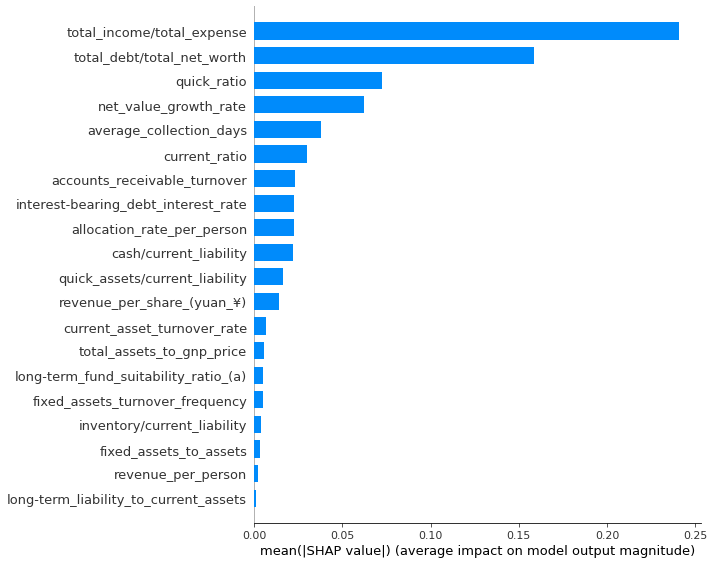

In [152]:
# random forest explainer: tree explainer and shap values
explainer = shap.TreeExplainer(rf_model.steps[-1][-1].best_estimator_)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

<AxesSubplot:>

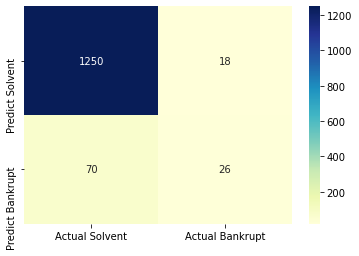

In [156]:
# best model analysis: heatmap
cm = confusion_matrix(X_pred, y_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Solvent', 'Actual Bankrupt'], index=['Predict Solvent', 'Predict Bankrupt'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

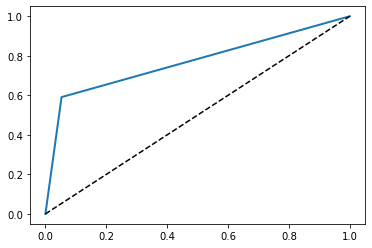

In [157]:
# best model analysis: roc and auc with graphs

fpr, tpr, thresholds = roc_curve(y_test, X_pred)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.show()

In [158]:
# best model explanation: permutation importance
perm = PermutationImportance(xgb_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3182 ± 0.0287,total_debt/total_net_worth
0.2136 ± 0.0464,quick_ratio
0.1864 ± 0.0927,total_income/total_expense
0.1364 ± 0.0287,net_value_growth_rate
0.0955 ± 0.0668,interest-bearing_debt_interest_rate
0.0455 ± 0.0498,long-term_liability_to_current_assets
0.0409 ± 0.0182,allocation_rate_per_person
0.0409 ± 0.0340,inventory/current_liability
0.0364 ± 0.0617,average_collection_days
0.0364 ± 0.0364,revenue_per_share_(yuan_¥)
